# Descriptive Statistics with Python

In [1]:
import math
import statistics

import numpy as np
import scipy
import scipy.stats
import pandas as pd
import seaborn as sns

In [2]:
print("Numpy version:", np.__version__)
print("Scipy version:", scipy.__version__)
print("Pandas version:", pd.__version__)

Numpy version: 1.19.1
Scipy version: 1.5.2
Pandas version: 1.1.2


In [3]:
list_x = [8., 1, 2.5, 4, 28.]
list_x_nan = [8., 1, 2.5, math.nan, 4, 28.]

print(list_x)
print(list_x_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [4]:
arr_x, arr_x_nan = np.array(list_x), np.array(list_x_nan)
series_x, series_x_nan = pd.Series(list_x), pd.Series(list_x_nan)

print(arr_x, arr_x_nan)
print(series_x, series_x_nan, sep="\n")

[ 8.   1.   2.5  4.  28. ] [ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Mean

### Arithmetic Mean

In [5]:
native_mean = sum(list_x) / len(list_x)
stats_mean = statistics.mean(list_x)
print("Native mean:", native_mean)
print("Statistics mean:", stats_mean)

Native mean: 8.7
Statistics mean: 8.7


In [6]:
print("List x with NaN:", list_x_nan)

native_mean_nan = sum(list_x_nan) / len(list_x_nan)
stats_mean_nan = statistics.mean(list_x_nan)
arr_mean_nan = arr_x_nan.mean()
np_mean_nan = np.mean(arr_x_nan)

print("Native mean with NaN:", native_mean_nan)
print("Statistics mean with NaN:", stats_mean_nan)
print("Array mean with NaN:", arr_mean_nan)
print("Numpy mean with NaN:", np_mean_nan)

List x with NaN: [8.0, 1, 2.5, nan, 4, 28.0]
Native mean with NaN: nan
Statistics mean with NaN: nan
Array mean with NaN: nan
Numpy mean with NaN: nan


In [7]:
np_mean_ignoring_nan = np.nanmean(arr_x_nan)
print("Numpy mean with NaN ignored:", np_mean_ignoring_nan)

Numpy mean with NaN ignored: 8.7


In [8]:
# pandas by default will ignore NaNs
series_x_nan.mean(), series_x.mean(), series_x_nan.mean(skipna=False)

(8.7, 8.7, nan)

### Weighted Mean

In [9]:
list_weight = [.1, .2, .3, .25, .15]
print("List x:", list_x)
print("List weights:", list_weight)

List x: [8.0, 1, 2.5, 4, 28.0]
List weights: [0.1, 0.2, 0.3, 0.25, 0.15]


In [10]:
jumlah = 0
for idx in range(len(list_x)):
    jumlah += list_weight[idx] * list_x[idx]
print(jumlah)

6.95


In [11]:
weighted_mean = sum(list_weight[idx] * list_x[idx] for idx in range(len(list_x))) / sum(list_weight)
print(weighted_mean)

weighted_mean = sum(w*x for w, x in zip(list_weight, list_x)) / sum(list_weight)
print(weighted_mean)

weighted_mean = np.average(list_x, weights=list_weight)
print(weighted_mean)

6.95
6.95
6.95


### Harmonic Mean

In [12]:
harmonic_mean = len(list_x) / sum(1 / x for x in list_x)
scipy_harmonic_mean = scipy.stats.hmean(list_x)
stats_harmonic_mean = statistics.harmonic_mean(list_x)
print("Native harmonic mean:", harmonic_mean)
print("Native arithmetic mean:", sum(list_x) / len(list_x))
print("Scipy harmonic mean:", scipy_harmonic_mean)
print("Statistics harmonic mean:", stats_harmonic_mean)

Native harmonic mean: 2.7613412228796843
Native arithmetic mean: 8.7
Scipy harmonic mean: 2.7613412228796843
Statistics harmonic mean: 2.7613412228796843


### Geometric Mean

In [13]:
geometric_mean = 1
for value in list_x:
    geometric_mean *= value
geometric_mean **= (1/len(list_x))
print("Native geometric mean:", geometric_mean)

scipy_geometric_mean = scipy.stats.gmean(list_x)
print("Scipy geometric mean:", scipy_geometric_mean)

print("Scipy geometric mean with nan:", scipy.stats.gmean(list_x_nan))

Native geometric mean: 4.677885674856041
Scipy geometric mean: 4.67788567485604
Scipy geometric mean with nan: nan


## Median

In [14]:
num_data = len(list_x)
print(sorted(list_x))
print("Number of values:", num_data)

if num_data % 2:    # n is odd
    native_median = sorted(list_x)[round((num_data-1) / 2)]
else:    # n is even
    median_idx = num_data / 2
    native_median = (sorted(x)[median_idx-1] + sorted(x)[median_idx]) / 2
print("Native median:", native_median)

[1, 2.5, 4, 8.0, 28.0]
Number of values: 5
Native median: 4


In [15]:
num_data = len(list_x[:-1])
print(sorted(list_x[:-1]))
print("Number of values:", num_data)

if num_data % 2:    # n is odd
    native_median = sorted(list_x)[round((num_data-1) / 2)]
else:    # n is even
    median_idx = round(num_data / 2)
    native_median = (sorted(list_x)[median_idx-1] + sorted(list_x)[median_idx]) / 2
print("Native median:", native_median)

[1, 2.5, 4, 8.0]
Number of values: 4
Native median: 3.25


In [16]:
print(statistics.median(list_x))
print(statistics.median(list_x[:-1]))

print(statistics.median_high(list_x[:-1]))
print(statistics.median_low(list_x[:-1]))

print(sorted(list_x_nan))
print(statistics.median(list_x_nan))
print(statistics.median_high(list_x_nan))
print(statistics.median_low(list_x_nan))

print(sorted(list_x_nan[1:]))
print(statistics.median(list_x_nan[1:]))
print(statistics.median_high(list_x_nan[1:]))
print(statistics.median_low(list_x_nan[1:]))

np_median = np.median(list_x)
print("Numpy median:", np_median)
print("Numpy median list_x[:-1]:", np.median(list_x[:-1]))
print("Numpy median with NaN:", np.median(list_x_nan))
print("Numpy median with NaN list_x_nan[1:]:", np.median(list_x_nan[1:]))
print("Numpy median ignoring NaN:", np.nanmedian(list_x_nan))
print("Numpy median ignoring NaN list_x_nan[1:]:", np.nanmedian(list_x_nan[1:]))

4
3.25
4
2.5
[1, 2.5, 4, 8.0, nan, 28.0]
6.0
8.0
4
[1, 2.5, nan, 4, 28.0]
nan
nan
nan
Numpy median: 4.0
Numpy median list_x[:-1]: 3.25
Numpy median with NaN: nan
Numpy median with NaN list_x_nan[1:]: nan
Numpy median ignoring NaN: 4.0
Numpy median ignoring NaN list_x_nan[1:]: 3.25


## Mode

In [17]:
list_u = [2, 8, 3, 2, 12]
list_v = [12, 15, 21, 15, 16, 16]

print("List u:", list_u)
print("List v:", list_v)

List u: [2, 8, 3, 2, 12]
List v: [12, 15, 21, 15, 16, 16]


In [18]:
native_mode_u = max((list_u.count(value), value) for value in set(list_u))[1]
native_mode_v = max((list_v.count(value), value) for value in set(list_v))[1]
print("Native mode u:", native_mode_u)
print("Set of list_v:", set(list_v))
print("Native mode v:", native_mode_v)

stats_mode_u = statistics.mode(list_u)
# stats_mode_v = statistics.mode(list_v)    # will throw error
print("Statistics mode u:", stats_mode_u)
# print("Statistics mode v:", stats_mode_v)    # will throw error

scipy_mode_u = scipy.stats.mode(list_u)
scipy_mode_v = scipy.stats.mode(list_v)
print("Scipy mode u:", scipy_mode_u, scipy_mode_u.mode, scipy_mode_u.count)
print("Scipy mode v:", scipy_mode_v, scipy_mode_v.mode, scipy_mode_v.count)

series_u, series_v = pd.Series(list_u), pd.Series(list_v)
print(series_u.mode())
print(series_v.mode())

series_w = pd.Series([2, 2, math.nan, math.nan, math.nan])
print(series_w.mode())
print(series_w.mode(dropna=False))

Native mode u: 2
Set of list_v: {16, 12, 21, 15}
Native mode v: 16
Statistics mode u: 2
Scipy mode u: ModeResult(mode=array([2]), count=array([2])) [2] [2]
Scipy mode v: ModeResult(mode=array([15]), count=array([2])) [15] [2]
0    2
dtype: int64
0    15
1    16
dtype: int64
0    2.0
dtype: float64
0   NaN
dtype: float64


### Variance

In [19]:
n = len(list_x)
avg = sum(list_x) / n

native_variance = sum((value - avg)**2 for value in list_x) / (n-1)
print("Native sample variance:", native_variance)

stats_variance = statistics.variance(list_x)
print("Statistics sample variance:", stats_variance)
print("Statistics sample variance with nan:", statistics.variance(list_x_nan))

np_variance = np.var(list_x, ddof=1)
print("Numpy sample variance:", np_variance)
print("Numpy sample variance with nan:", np.var(list_x_nan, ddof=1))

arr_variance = arr_x.var(ddof=1)
print("Array sample variance:", arr_variance)
print("Array sample variance with nan:", arr_x_nan.var(ddof=1))

series_variance = series_x.var()
series_variance_nan = series_x_nan.var()
print("Series sample variance:", series_variance)
print("Series sample variance with nan:", series_variance_nan)

Native sample variance: 123.19999999999999
Statistics sample variance: 123.2
Statistics sample variance with nan: nan
Numpy sample variance: 123.19999999999999
Numpy sample variance with nan: nan
Array sample variance: 123.19999999999999
Array sample variance with nan: nan
Series sample variance: 123.19999999999999
Series sample variance with nan: 123.19999999999999


## Standard Deviation

In [20]:
native_stdev = native_variance ** .5
print("Native sample std:", native_stdev)

stats_stdev = statistics.stdev(list_x)
print("Statistics sample std:", stats_stdev)

np_stdev = np.std(list_x, ddof=1)
arr_stdev = arr_x.std(ddof=1)
print("Numpy sample std:", np_stdev)
print("Array sample std:", arr_stdev)

series_stdev = series_x.std()
series_stdev_nan = series_x_nan.std()
print("Series sample variance:", series_stdev)
print("Series sample variance with nan:", series_stdev_nan)

Native sample std: 11.099549540409285
Statistics sample std: 11.099549540409287
Numpy sample std: 11.099549540409285
Array sample std: 11.099549540409285
Series sample variance: 11.099549540409285
Series sample variance with nan: 11.099549540409285


## Skewness

In [21]:
print("List x:", list_x)
n = len(list_x)
avg = sum(list_x) / n
var_ = sum((value - avg)**2 for value in list_x) / (n-1)
stdev_ = var_ ** .5

skewness_ = (sum((value - avg)**3 for value in list_x) * n / ((n - 1) * (n - 2) * stdev_**3))
print("Skewness:", skewness_)

List x: [8.0, 1, 2.5, 4, 28.0]
Skewness: 1.9470432273905929


In [22]:
scipy.stats.skew(list_x, bias=False)

1.9470432273905927

In [23]:
scipy.stats.skew(list_x_nan, bias=False, nan_policy="omit")

masked_array(data=1.94704323,
             mask=False,
       fill_value=1e+20)

In [24]:
series_x.skew()

1.9470432273905924

## Percentiles

In [25]:
print(arr_x)
percentile_50 = np.percentile(arr_x, 50)
percentile_25 = np.percentile(arr_x, 25)
percentile_75 = np.percentile(arr_x, 75)
print("25th percentile:", percentile_25)
print("50th percentile:", percentile_50)
print("75th percentile:", percentile_75)

print("Quartiles:", np.percentile(arr_x, [25, 50, 75]))

[ 8.   1.   2.5  4.  28. ]
25th percentile: 2.5
50th percentile: 4.0
75th percentile: 8.0
Quartiles: [2.5 4.  8. ]


In [26]:
series_x.quantile([.25, .5, .75])

0.25    2.5
0.50    4.0
0.75    8.0
dtype: float64

In [27]:
series_x_nan.quantile([.25, .5, .75])

0.25    2.5
0.50    4.0
0.75    8.0
dtype: float64

## Range

In [28]:
print("List x:", list_x)
print(np.ptp(list_x))

print("List x with nan:", list_x_nan)
print(np.ptp(list_x_nan))

List x: [8.0, 1, 2.5, 4, 28.0]
27.0
List x with nan: [8.0, 1, 2.5, nan, 4, 28.0]
nan


In [29]:
np.nanmax(list_x_nan) - np.nanmin(list_x_nan)

27.0

In [30]:
print(series_x.max() - series_x.min())
print(series_x_nan.max() - series_x_nan.min())

27.0
27.0


## Interquartile Range

In [31]:
np_quartiles = np.quantile(list_x, [.25, .5, .75])
print(np_quartiles)

np_iqr = np_quartiles[-1] - np_quartiles[0]
print("IQR:", np_iqr)

[2.5 4.  8. ]
IQR: 5.5


## Covariance

In [32]:
list_x = list(range(-10, 11))
list_y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
print(len(list_x), len(list_y))

21 21


In [33]:
mean_x, mean_y = sum(list_x)/len(list_x), sum(list_y)/len(list_y)
print(mean_x, mean_y)

# sigma_x, sigma_y = np.array([x-mean_x for x in list_x]), np.array([y-mean_y for y in list_y])

# cov_xy = (sigma_x*sigma_y).sum() / n-1
cov_xy = (sum((list_x[idx] - mean_x)*(list_y[idx] - mean_y) for idx in range(n)) / (n-1))
cov_xy = (sum((list_x[idx] - mean_x)*(list_y[idx] - mean_y) for idx in range(n)) / (n - 1))
print(cov_xy)

0.0 5.714285714285714
42.142857142857146


In [34]:
np.cov(list_x, list_y)

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

## Correlation

In [35]:
print(list_x)
print(list_y)
r, p = scipy.stats.pearsonr(list_x, list_y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]


In [36]:
np.corrcoef(list_x, list_y)

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [37]:
series_x.corr(series_x)

1.0

In [38]:
series_x = pd.Series(list_x)
series_y = pd.Series(list_y)
series_x.corr(series_y)

0.8619500056316061

## Correlation in 2D data

In [39]:
data = np.random.randint(0, 100, size=(10, 10))
print(data)

[[73 16 22 37 55  5 45 62 33 63]
 [62 62 28 26 48 62 78 29 29 51]
 [64 29 48 26 76  7 88 11 15 53]
 [81 41  8 69 39 47 63  3 99  0]
 [17 38 60 48 72  0 15 46 24 50]
 [51 53 59 40 59 98 41 79 72 40]
 [93 83 16 20 89 52 77  3  9 41]
 [26  6  4 40 36 14 30 22 73 61]
 [84 38 51 67  0 42 24  3 98 81]
 [22 27  7 19 33 25 14 44 52 46]]


In [40]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,73,16,22,37,55,5,45,62,33,63
1,62,62,28,26,48,62,78,29,29,51
2,64,29,48,26,76,7,88,11,15,53
3,81,41,8,69,39,47,63,3,99,0
4,17,38,60,48,72,0,15,46,24,50
5,51,53,59,40,59,98,41,79,72,40
6,93,83,16,20,89,52,77,3,9,41
7,26,6,4,40,36,14,30,22,73,61
8,84,38,51,67,0,42,24,3,98,81
9,22,27,7,19,33,25,14,44,52,46


In [41]:
df_corr = df.corr()
df_corr

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.484701,-0.043908,0.205916,0.021387,0.336733,0.628690,-0.476105,0.060483,-0.114374
1,0.484701,1.000000,0.174962,-0.198519,0.404800,0.653554,0.474682,-0.187904,-0.288753,-0.304004
2,-0.043908,0.174962,1.000000,0.205327,0.146707,0.141780,-0.090581,0.296610,-0.109933,0.321035
3,0.205916,-0.198519,0.205327,1.000000,-0.549961,0.046742,-0.299104,-0.220699,0.768833,-0.135404
4,0.021387,0.404800,0.146707,-0.549961,1.000000,-0.068914,0.502915,0.150009,-0.809502,-0.285684
5,0.336733,0.653554,0.141780,0.046742,-0.068914,1.000000,0.224826,0.150678,0.316209,-0.308963
6,0.628690,0.474682,-0.090581,-0.299104,0.502915,0.224826,1.000000,-0.396583,-0.407929,-0.318270
7,-0.476105,-0.187904,0.296610,-0.220699,0.150009,0.150678,-0.396583,1.000000,-0.107178,0.095499
8,0.060483,-0.288753,-0.109933,0.768833,-0.809502,0.316209,-0.407929,-0.107178,1.000000,-0.144675
9,-0.114374,-0.304004,0.321035,-0.135404,-0.285684,-0.308963,-0.318270,0.095499,-0.144675,1.000000


<AxesSubplot:>

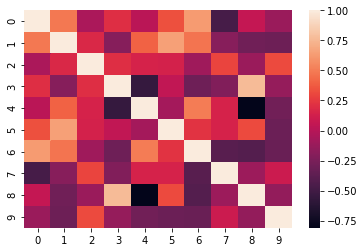

In [42]:
sns.heatmap(df_corr)